In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/english-premier-league-and-championship-full-dataset/England CSV.csv
/kaggle/input/english-premier-league-and-championship-full-dataset/England 2 CSV.csv


In [2]:
pl_table = pd.read_csv("/kaggle/input/english-premier-league-and-championship-full-dataset/England CSV.csv")
pl_table

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,...,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,...,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,...,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,...,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,...,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12148,14/08/1993,1993/94,Southampton,Everton,0,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12149,14/08/1993,1993/94,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12150,14/08/1993,1993/94,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12151,14/08/1993,1993/94,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League


In [3]:
#pl_table.columns
unique_teams = pd.unique(pl_table.HomeTeam)
print(unique_teams)

['Ipswich Town' 'Man United' 'Everton' 'Leicester' 'Newcastle' 'Arsenal'
 'Brentford' 'Chelsea' 'West Ham' "Nott'm Forest" 'Wolves' 'Fulham'
 'Liverpool' 'Tottenham' 'Aston Villa' 'Bournemouth' 'Crystal Palace'
 'Man City' 'Southampton' 'Brighton' 'Ipswich' 'Brighton & Hove Albion'
 'Sheffield United' 'Burnley' 'Luton' 'Leeds' 'Norwich' 'Watford'
 'West Brom' 'Huddersfield' 'Cardiff' 'Swansea' 'Stoke' 'Hull'
 'Sunderland' 'Middlesbrough' 'QPR' 'Wigan' 'Reading' 'Blackburn' 'Bolton'
 'Birmingham' 'Blackpool' 'Portsmouth' 'Derby' 'Charlton' 'Coventry'
 'Bradford' 'Sheffield Weds' 'Wimbledon' 'Barnsley' 'Swindon' 'Oldham']


In [4]:
#check for null values
pl_table.isna().sum()

Date                0
Season              0
HomeTeam            0
AwayTeam            0
FTH Goals           0
FTA Goals           0
FT Result           0
HTH Goals         924
HTA Goals         924
HT Result         924
Referee          2824
H Shots          2824
A Shots          2824
H SOT            2824
A SOT            2824
H Fouls          2824
A Fouls          2824
H Corners        2824
A Corners        2824
H Yellow         2824
A Yellow         2824
H Red            2824
A Red            2824
Display_Order       0
League              0
dtype: int64

In [5]:
pl_table[pl_table['Referee'].isna()]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
9329,14/05/2000,1999/00,Everton,Middlesbrough,0,2,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000514,Premier League
9330,14/05/2000,1999/00,Southampton,Wimbledon,2,0,H,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000514,Premier League
9331,14/05/2000,1999/00,Newcastle,Arsenal,4,2,H,2.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000514,Premier League
9332,14/05/2000,1999/00,Bradford,Liverpool,1,0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000514,Premier League
9333,14/05/2000,1999/00,Watford,Coventry,1,0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000514,Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12148,14/08/1993,1993/94,Southampton,Everton,0,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12149,14/08/1993,1993/94,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12150,14/08/1993,1993/94,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12151,14/08/1993,1993/94,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League


In [6]:
pl_table.describe()

,FTH Goals,FTA Goals,HTH Goals,HTA Goals,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order
count,12153.000000,12153.000000,11229.000000,11229.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,1.215300e+04
mean,1.531309,1.160948,0.689554,0.511265,13.618716,10.784543,6.007503,4.704684,11.303462,11.781113,6.056383,4.770715,1.462536,1.785722,0.062386,0.085968,2.008629e+07
std,1.306927,1.147714,0.838796,0.731610,5.349420,4.678710,3.275177,2.757288,3.752442,3.931377,3.107327,2.746754,1.215747,1.285168,0.252706,0.291579,9.224046e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.993081e+07
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,9.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.001010e+07
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,11.000000,12.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.009012e+07
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,14.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,2.017012e+07
max,9.000000,9.000000,5.000000,5.000000,43.000000,31.000000,24.000000,20.000000,33.000000,29.000000,20.000000,19.000000,7.000000,9.000000,3.000000,2.000000,2.025012e+07


In [7]:
pl_table.dtypes

Date              object
Season            object
HomeTeam          object
AwayTeam          object
FTH Goals          int64
FTA Goals          int64
FT Result         object
HTH Goals        float64
HTA Goals        float64
HT Result         object
Referee           object
H Shots          float64
A Shots          float64
H SOT            float64
A SOT            float64
H Fouls          float64
A Fouls          float64
H Corners        float64
A Corners        float64
H Yellow         float64
A Yellow         float64
H Red            float64
A Red            float64
Display_Order      int64
League            object
dtype: object

In [8]:
# gives me all the games where man city was the home team.
temp  = (pl_table['HomeTeam']== 'Leicester').sum()
print(temp)


pl_table.loc[(pl_table['HomeTeam']=='Man City') & (pl_table['FTA Goals'] >= 4)]


336


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
95,23/11/2024,2024/25,Man City,Tottenham,0,4,A,0.0,2.0,A,...,19.0,9.0,9.0,3.0,4.0,2.0,0.0,0.0,20241123,Premier League
1704,27/09/2020,2020/21,Man City,Leicester,2,5,A,1.0,1.0,D,...,13.0,8.0,3.0,4.0,1.0,3.0,0.0,0.0,20200927,Premier League
3502,21/11/2015,2015/16,Man City,Liverpool,1,4,A,1.0,3.0,A,...,5.0,13.0,11.0,5.0,0.0,3.0,0.0,0.0,20151121,Premier League
8297,22/02/2003,2002/03,Man City,Arsenal,1,5,A,0.0,4.0,A,...,7.0,7.0,14.0,4.0,0.0,0.0,0.0,0.0,20030222,Premier League
9012,11/04/2001,2000/01,Man City,Arsenal,0,4,A,0.0,4.0,A,...,10.0,8.0,7.0,3.0,2.0,0.0,0.0,0.0,20010411,Premier League
9107,13/01/2001,2000/01,Man City,Leeds,0,4,A,0.0,1.0,A,...,23.0,17.0,4.0,5.0,5.0,3.0,0.0,0.0,20010113,Premier League
9127,30/12/2000,2000/01,Man City,Charlton,1,4,A,0.0,2.0,A,...,11.0,14.0,7.0,4.0,1.0,2.0,0.0,0.0,20001230,Premier League


<Figure size 3000x3000 with 0 Axes>

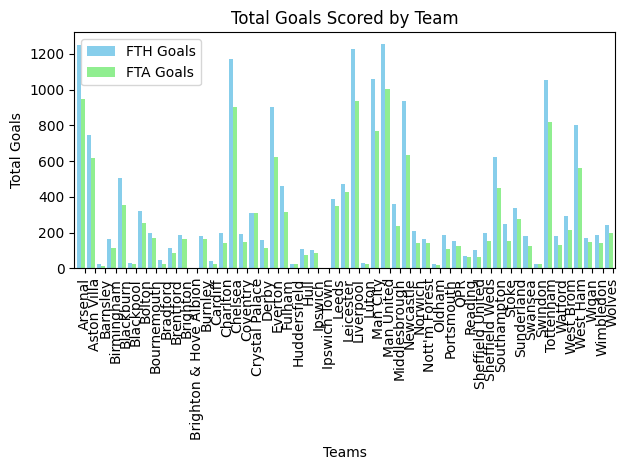

In [9]:
home_goals = pl_table.groupby('HomeTeam')['FTH Goals'].sum()
away_goals = pl_table.groupby('AwayTeam')['FTA Goals'].sum()

total_goals = pd.concat([home_goals, away_goals], axis=1).fillna(0)

plt.figure(figsize=(30,30))
total_goals.plot(kind='bar', color=['skyblue', 'lightgreen'], width=0.8,position=1)
plt.title('Total Goals Scored by Team')
plt.xlabel('Teams')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()